<center><h1 style = 'color: Orange'>Suicide Rate Analysis</h1></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Suicide Data.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


**Questions to be Explored:**
- ☑ Is the suicide rate more prominent in some age categories than others?
- ☑ Which countries have the most and the least number of suicides?
- ☑ What is the effect of the population on suicide rates?
- ☑ What is the effect of the GDP of a country on suicide rates?
- ☑ What is the trend of suicide rates across all the years?
- ☑ Is there a difference between the suicide rates of men and women

### `Question: 1` - Is the suicide rate more prominent in some age categories than others?


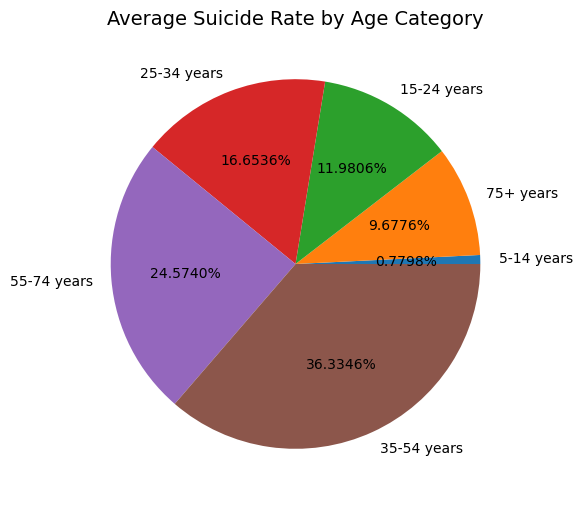

In [3]:
age_suicide_rate = df.groupby('age')['suicides_no'].mean().sort_values()
plt.figure(figsize=(8,6))

plt.pie(age_suicide_rate, labels=age_suicide_rate.index, autopct="%.4f%%")
plt.title("Average Suicide Rate by Age Category", fontsize=14)

plt.show()


**✅ Yes, The suicide rate is most prominent in the 35-54 age group, accounting for 36.33% of the total**

### `Question: 2` - Which countries have the most and the least number of suicides?


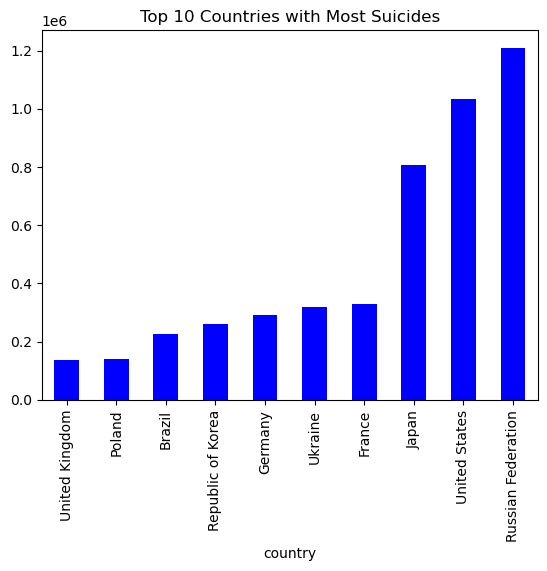

In [4]:

country_suicides = df.groupby('country')['suicides_no'].sum().sort_values()
most_suicides = country_suicides.tail(10)
least_suicides = country_suicides.head(10)

most_suicides.plot(kind='bar', color='blue', title='Top 10 Countries with Most Suicides')
plt.show()


<Axes: title={'center': 'Top 10 Countries with Least Suicides'}, xlabel='country'>

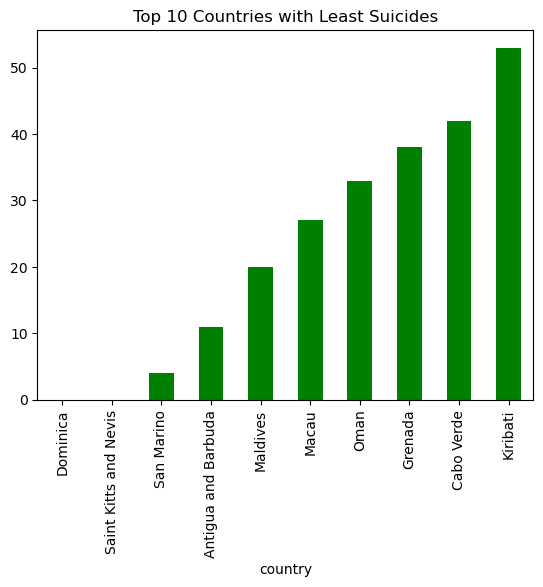

In [5]:
least_suicides.plot(kind='bar', color='green', title='Top 10 Countries with Least Suicides')

- **✅ `Russia` leads with the highest suicide numbers.**
- **✅ While `Dominica` report the very low suicides**


### `Question: 3` - What is the effect of the population on suicide rates?


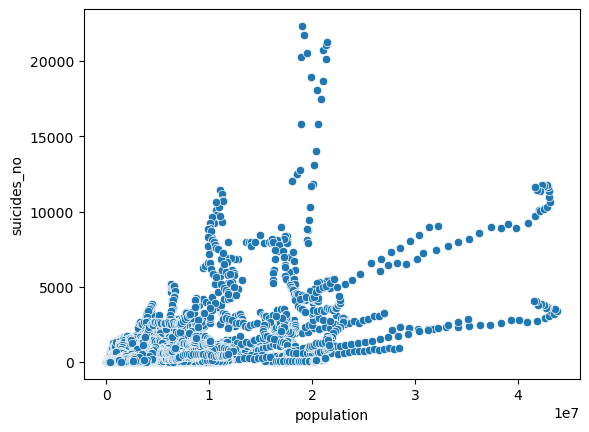

In [33]:
sns.scatterplot(x='population', y='suicides_no', data=df)
plt.show()

- **✅ In this plot some smaller populations shows high suicide numbers**

### `Question: 4` - What is the effect of the GDP of a country on suicide rates?

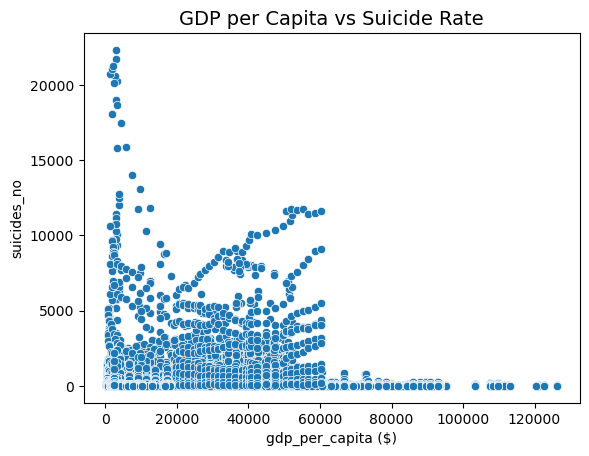

In [28]:
sns.scatterplot(x='gdp_per_capita ($)', y='suicides_no', data=df)
plt.title("GDP per Capita vs Suicide Rate", fontsize=14)

plt.show()

**✅ The plot shows that As GDP per capita increases, suicide numbers generally decrease**

### `Question: 5` - What is the trend of suicide rates across all the years?


<Axes: xlabel='year'>

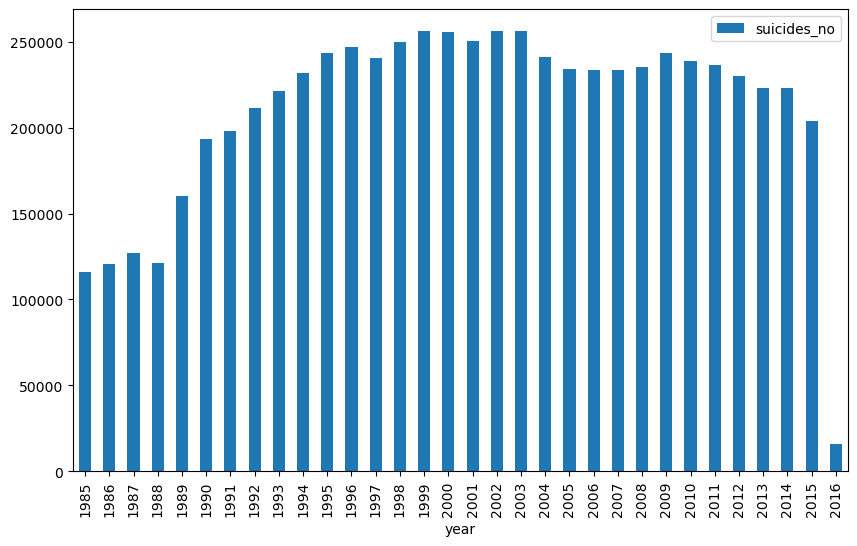

In [44]:
year_suicide_no = df.groupby(['year'])['suicides_no'].sum()
year_suicide_no.plot(kind='bar',legend=True,figsize=(10,6))

- **✅ Since 1985, the trend in suicide rates has been increasing, reaching its peak around 2000, but by 2016, the suicide rates had significantly decreased.**

### `Question: 6` - Is there a difference between the suicide rates of men and women

In [29]:
sex_analysis = df.groupby('sex')['suicides_no'].mean()

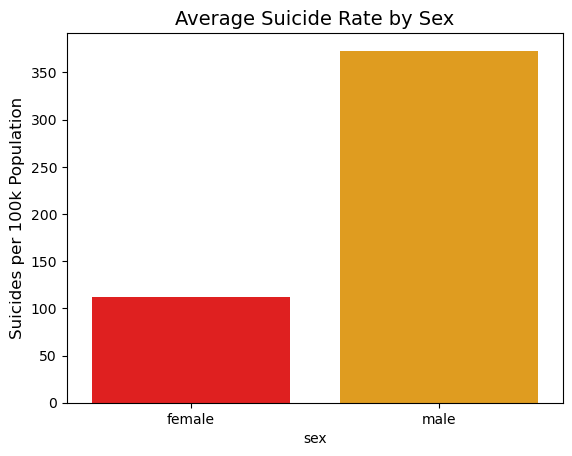

In [30]:

sns.barplot(x=sex_analysis.index, y=sex_analysis.values, palette=['red', 'orange'], hue=sex_analysis.index)
plt.title("Average Suicide Rate by Sex", fontsize=14)
plt.ylabel("Suicides per 100k Population", fontsize=12)
plt.show()


- **✅ The male gender committed suicide at a much higher rate than the female gender.**

## `Question: 7` - Show the Number of Suicides by Generation

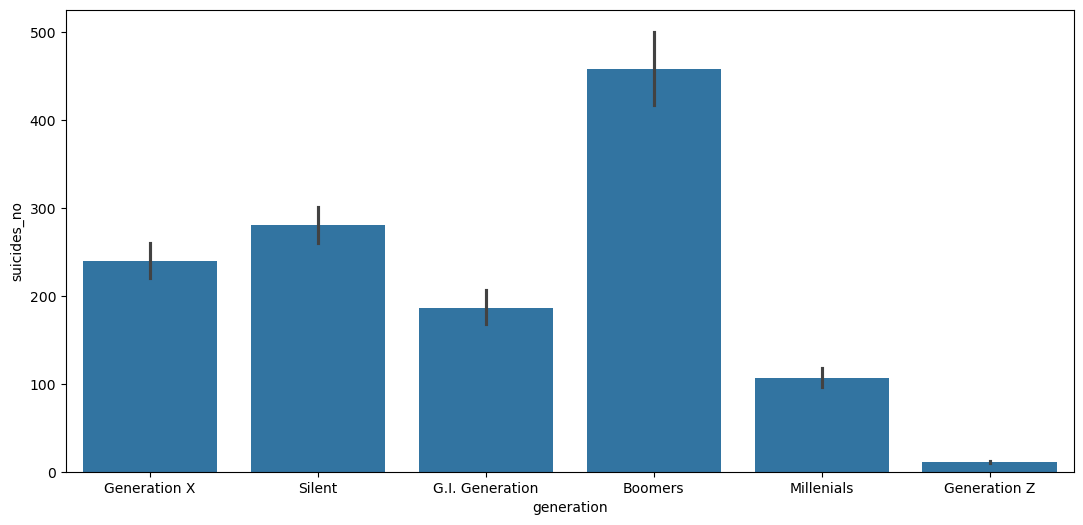

In [21]:
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['generation'], y = 'suicides_no',data=df)

- **✅ The `Boomer` generation has the highest total number of suicides compared to other generations, indicating that this group may face significant challenges that contribute to higher suicide rates.**